#### EJERCICIO NAIVE BAYES Ralhpy, Made, Gabriel y Mercedes

##### ENUNCIADO: Aunque se podría utilizar para tareas de regresión, normalmente este algoritmo se utiliza en clasificación. Echa un vistazo a clasificadores Naïve Bayes. Dado este dataset, decide qué tipo de Naïve Bayes(Gaussiano, Multinomial, Bernoulli) parece ser más adecuado y utilízalo para predecir si los clientes compran o no el producto

<p>Una vez leída la documentación, consideramos que lo más apropiado para tratar este problema es la clasificación Gaussiana, ya que la clasificación multinomial se utiliza para tratar datos de frecuencia, con distribuciones multinomiales y la de bernoulli se suele utilizar cuando se están tratando datos binarios, es decir, con valores 0 y 1. En este caso, estamos tratando datos continuos, como la edad o el salario estimado, por ello, debemos utilizar la distribución gaussiana. Una vez explicado el método utilizado, explicaremos el código abajo.<p>

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, auc
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt    
import numpy as np
#Leemos el dataset
customerData=pd.read_csv("Customer_Behaviour.csv")
#Pasamos los valores de género a 0 si es masculino o 1 si es femenino.
customerData["Gender"]=customerData.Gender.map({'Male':0,'Female':1})
#Renombramos las columnas a español
customerData.columns=("ID Usuario","Sexo","Edad","SalarioEstimado","Comprado")
#Mostramos el dataset
customerData

,ID Usuario,Sexo,Edad,SalarioEstimado,Comprado
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


#### Mostramos la columna que queremos calcular

In [2]:
customerData["Comprado"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Comprado, Length: 400, dtype: int64

#### Haremos un mapa de calor para motrar la relación entre las variables, pero sabemos de sobra que las variables que influyen son la edad y el salario, ya que el identificador de la persona no tiene nada que ver

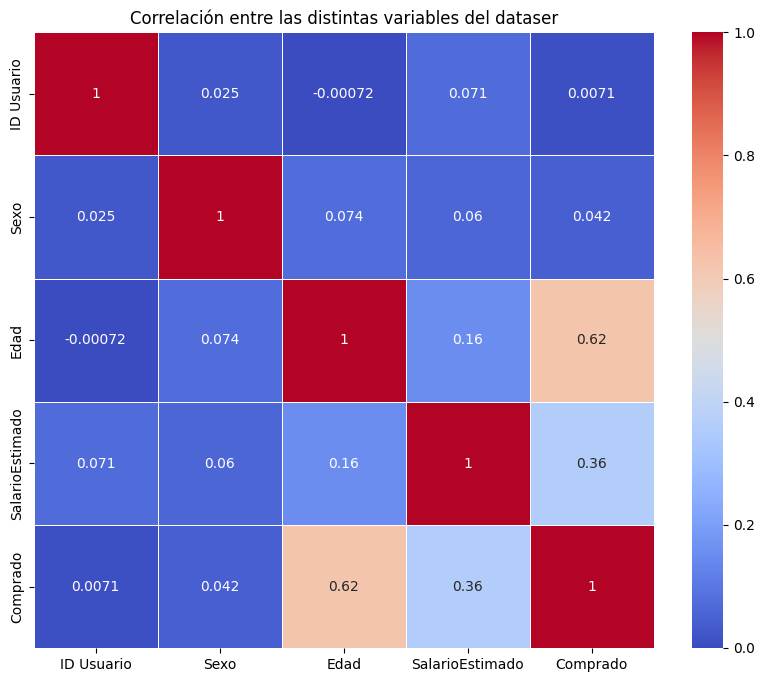

In [4]:
plt.figure(figsize=(10,8))
plt.title("Correlación entre las distintas variables del dataser")
sns.heatmap(customerData.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

### Como podemos observar, los que más influyen son la edad y el salario, así que usaremos esas dos para hacer las predicciones.

## Ahora haremos el entrenamiento

#### Primero dividiremos los datos y los entrenaremos como siempre, en proporción 80/20. Como se puede observar, hemos tenido que escalar los datos debido a la diferencia de cifras que hay entre ellas.

In [12]:
X=customerData[["Edad","SalarioEstimado"]]
y=customerData["Comprado"]
scaler = StandardScaler()
customerData[["Edad", "SalarioEstimado"]] = scaler.fit_transform(customerData[["Edad", "SalarioEstimado"]])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Ahora crearemos un modelo de Navis Gaussiano, debido a que es el más indicado para este tipo de dataset.

In [13]:
entrenador=GaussianNB()
entrenador.fit(X_train,y_train)

GaussianNB()

#### Ahora, imprimiremos y mostraremos las estadísticas y realizaremos las predicciones.

In [14]:
predicciones=entrenador.predict(X_test)
report=classification_report(y_test,predicciones)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.83      0.83      0.83        23

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80



#### Por si hay alguna duda, voy a mostrar también los resultados utilizando también la variable sexo.

In [15]:
X=customerData[["Edad","SalarioEstimado","Sexo"]]
y=customerData["Comprado"]
scaler = StandardScaler()
customerData[["Edad", "SalarioEstimado"]] = scaler.fit_transform(customerData[["Edad", "SalarioEstimado"]])
X_train_sexo,X_test_sexo,y_train_sexo,y_test_sexo=train_test_split(X,y,test_size=0.2)
entrenador=GaussianNB()
entrenador.fit(X_train_sexo,y_train_sexo)
predicciones=entrenador.predict(X_test_sexo)
report=classification_report(y_test_sexo,predicciones)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.83      0.77      0.80        26

    accuracy                           0.88        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.88      0.87        80



#### Como podemos observar, los datos apenas cambian debido a que su influencia en mínima por no decir NULA.

#### Por último, mostraremos los resultado a través de una matriz de confusión.

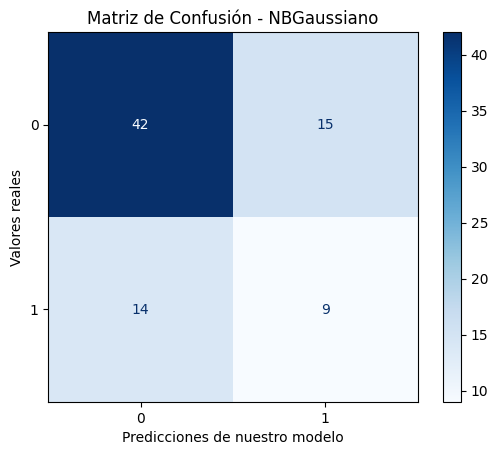

In [16]:
#Por último, vamos a hacer la matriz de confusión para mostrar los resultados de nuestra predicción.
cm = confusion_matrix(y_test, predicciones)#Utilizamos, como siempre, el test y las predicciones hechas a través del X_test
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - NBGaussiano")
plt.xlabel("Predicciones de nuestro modelo")
plt.ylabel("Valores reales")
plt.show()

#### Ahora, haremos una gráfica que represente las edades con respecto a si lo compró o no.

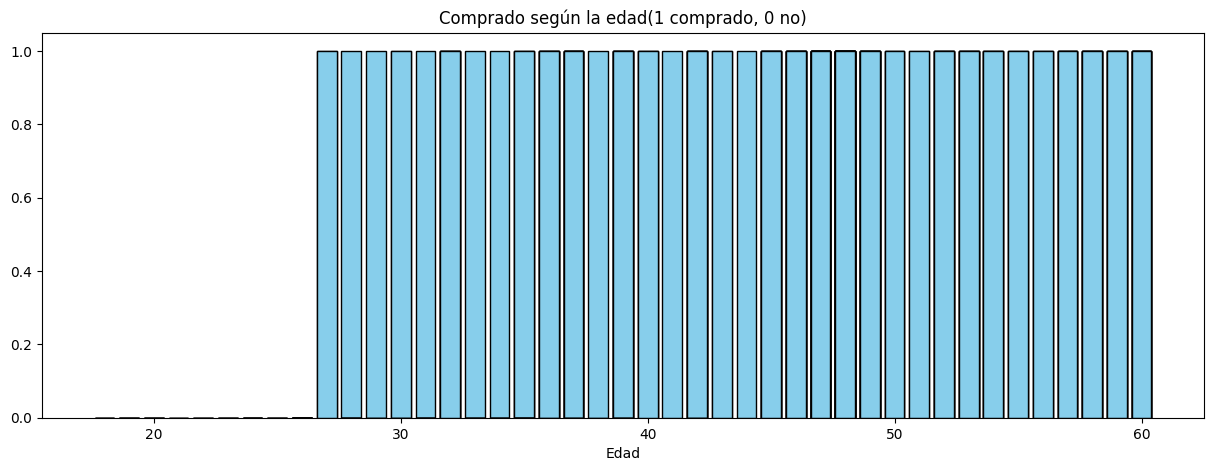

In [28]:
plt.figure(figsize=(15, 5))
plt.bar(customerData["Edad"],customerData["Comprado"] ,color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Edad')
plt.title('Comprado según la edad(1 comprado, 0 no)')


# Mostrar la gráfica
plt.show()

#### Como podemos observar, predice bastante bien los casos verdaderos como verdaderos, mientras que algunos todavía los predice como falsos aunque sean verdaderos, pero eso se debe a que todavía tiene un poco de error. Aún así, en este caso, el acierto suele ser alto(aunque depende del clocking del ordenador).